# 导入包

In [1]:
# coding: utf-8

#csv导入为dataframe的包
import pandas as pd
from pandas import Series, DataFrame
#导入时间和复制的包
import datetime,time
import copy

##解决在jupyter中画图不显示的问题
get_ipython().magic(u'matplotlib inline')
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
#解决中文编码的问题
import sys
defaultencoding = 'utf-8'
if sys.getdefaultencoding() != defaultencoding:
    reload(sys)
    sys.setdefaultencoding(defaultencoding)


import this

# 导入数据&数据排序&数据去重

In [69]:
data = pd.read_csv("K:/16.12.6-python/data/9.csv", low_memory = False)

In [70]:
'''
函数名：SortData 
作者：王卓文   
日期：16.12.30   
功能：按时间戳重新排序数据框数据，并按排序结果重新设置索引号   
输入参数：data(包含"TIMESTAMP"的数据框格式)
返回值： data（数据框格式）
'''
def SortData(data):
    return data.sort(["TIMESTAMP"],ascending=[1]).reset_index(drop=True)#按时间戳进行排序，ascending=1代表递增，0代表递减

In [71]:
'''
函数名：DeleteRep 
作者：王卓文  
日期：16.12.30   
功能：删除重复时间戳所在的行数，并重置索引号
输入参数：data(包含"TIMESTAMP"的数据框格式)
返回值： data（数据框格式）
'''
def DeleteRep(data):
    num=[]
    timestamp=data["TIMESTAMP"]
    for i in range(len(data.index)-1):
        if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
            num.append(i)
    data=data.drop(num,axis=0).reset_index(drop=True)#删掉重复的数据，只取不重复的数据
    return data

In [72]:
'''
函数名：VerifyRep
作者：王卓文   
日期：16.12.30   
功能：查看重复的TIMESTAMP所在行的索引号
输入参数：data(包含"TIMESTAMP"的数据框格式)
返回值： num（list格式）
'''
def VerifyRep(data):
    num=[]
    timestamp=data["TIMESTAMP"]
    for i in range(len(data.index)-1):
        if timestamp[i]==timestamp[i+1]:#获取数据重复点的索引位置
            num.append(i)
    return num

In [73]:
#1、数据需要按时间重新排序
data=SortData(data)
#2、此数据中有部分数据重复，需删除；
data=DeleteRep(data)
data

TIMESTAMP            DATIME_RX    鍖呭ご  缁堢�娑堟伅鍛戒护鍙� 缁堢�娑堟伅闀垮害  CAN缃戠粶娑堟伅鍛戒护鍙� \
0       1472347248680  2016-08-28 09:20:50  True      0.0     0.0       744.0   
1       1472347248849  2016-08-28 09:20:50  True      0.0     0.0       744.0   
2       1472347253669  2016-08-28 09:20:55  True      0.0     0.0       744.0   
3       1472347253830  2016-08-28 09:20:55  True      0.0     0.0       744.0   
4       1472347258665  2016-08-28 09:21:00  True      0.0     0.0       744.0   
5       1472347258840  2016-08-28 09:21:00  True      0.0     0.0       744.0   
6       1472347263687  2016-08-28 09:21:05  True      0.0     0.0       744.0   
7       1472347263828  2016-08-28 09:21:05  True      0.0     0.0       744.0   
8       1472347268668  2016-08-28 09:21:10  True      0.0     0.0       744.0   
9       1472347268838  2016-08-28 09:21:10  True      0.0     0.0       744.0   
10      1472347270694  2016-08-28 09:21:12  True    385.0    32.0         0.0   
11      1472347273668  2016-08-28 09:21:15  True      0.0     0.0       744.0   
12      1472347273964  2016-08-28 09:21:15  True      0.0     0.0       744.0   
13      1472347278761  2016-08-28 09:21:20  True      0.0     0.0       744.0   
14      1472347278830  2016-08-28 09:21:20  True      0.0     0.0       744.0   
15      1472347283673  2016-08-28 09:21:25  True      0.0     0.0       744.0   
16      1472347283825  2016-08-28 09:21:25  True      0.0     0.0       744.0   
17      1472347288680  2016-08-28 09:21:30  True      0.0     0.0       744.0   
18      1472347288828  2016-08-28 09:21:30  True      0.0     0.0       744.0   
19      1472347293723  2016-08-28 09:21:35  True      0.0     0.0       744.0   
20      1472347293834  2016-08-28 09:21:35  True      0.0     0.0       744.0   
21      1472347299233  2016-08-28 09:21:40  True      0.0     0.0       744.0   
22      1472347299304  2016-08-28 09:21:40  True      0.0     0.0       744.0   
23      1472347300687  2016-08-28 09:21:42  True    385.0    32.0         0.0   
24      1472347303665  2016-08-28 09:21:45  True      0.0     0.0       744.0   
25      1472347303907  2016-08-28 09:21:45  True      0.0     0.0       744.0   
26      1472347308675  2016-08-28 09:21:50  True      0.0     0.0       744.0   
27      1472347308835  2016-08-28 09:21:50  True      0.0     0.0       744.0   
28      1472347313671  2016-08-28 09:21:55  True      0.0     0.0       744.0   
29      1472347313815  2016-08-28 09:21:55  True      0.0     0.0       744.0   
...               ...                  ...   ...      ...     ...         ...   
671763  1474420778182  2016-09-21 09:19:40  True      0.0     0.0       744.0   
671764  1474420783031  2016-09-21 09:19:45  True      0.0     0.0       744.0   
671765  1474420783185  2016-09-21 09:19:45  True      0.0     0.0       744.0   
671766  1474420788023  2016-09-21 09:19:50  True      0.0     0.0       744.0   
671767  1474420788183  2016-09-21 09:19:50  True      0.0     0.0       744.0   
671768  1474420793072  2016-09-21 09:19:55  True      0.0     0.0       744.0   
671769  1474420793179  2016-09-21 09:19:55  True      0.0     0.0       744.0   
671770  1474420798016  2016-09-21 09:20:00  True      0.0     0.0       744.0   
671771  1474420798180  2016-09-21 09:20:00  True      0.0     0.0       744.0   
671772  1474420801010  2016-09-21 09:20:03  True    385.0    32.0         0.0   
671773  1474420803027  2016-09-21 09:20:05  True      0.0     0.0       744.0   
671774  1474420803200  2016-09-21 09:20:05  True      0.0     0.0       744.0   
671775  1474420808070  2016-09-21 09:20:10  True      0.0     0.0       744.0   
671776  1474420808225  2016-09-21 09:20:10  True      0.0     0.0       744.0   
671777  1474420813023  2016-09-21 09:20:15  True      0.0     0.0       744.0   
671778  1474420813177  2016-09-21 09:20:15  True      0.0     0.0       744.0   
671779  1474420818022  2016-09-21 09:20:20  True      0.0     0.0       744.0   
671780  1474420818176  2016-09-21

In [74]:
#3、验证数据是否删除完全
VerifyRep(data)

[]

# 分离三个上传模块数据

In [ ]:
'''
上传模块1（与温度、电量相关，采样间隔5s）：
运行模式、电机1状态、主继电器紧急断开、模式回馈、电机DICO状态、控制器温度、电机温度、进水温度、出水温度、出水温度传感器故障、
进水温度传感器故障、出水温度过温、进水温度过温、SOC、单体最高电压、单体最低电压、模组最高温度、模组最低温度、BMS状态、BMS绝缘状态、
总充电量、总放电量、剩余电量、后门信号、前门信号、手刹信号、气压1、气压2、续驶里程、单位电耗、总里程、转向助力指令、转向助力状态 

上传模块2（与车辆运行状态有关，采样间隔5s ）：制动开关、驻车制动开关、加速踏板、油门踏板位置、制动踏板位置、启动信号、档位请求、车行方向、
当前档位、启动回馈、主继电器状态、预充继电器状态、系统一般故障、系统严重故障、电机转速、电机扭矩、速度.3 、水温、主线电压、主线电流、
软件版本、电池电压、电池电流、绝缘阻值 、急停开关状态、后舱门信号、系统就绪Ready、高压互锁、DC/AC故障、DC/DC故障

上传模块3（采样间隔30s）：
终端消息命令号、终端消息长度、上报原因、里程、硬件版本号、软件版本号
'''

In [75]:
'''
函数名：DivUploadMod
作者：王卓文   
日期：16.12.30   
功能：分离三种上传模块的数据
输入参数：data
返回值： dict（"Mod1Data","Mod2Data","Mod3Data"）返回字典类型的数据，三个传感器模块名称如前
说明：该函数中先用"终端消息命令号"分离了上传模块3，再通过时间差以及模块2特有的"制动开关"，模块1特有的"电机1状态"来分离上传模块1、2。
     由于数据固有的缺省、异常（可见原数据分析ppt），分离后的值并不完美（将筛除掉大量数据），但可满足基本要求。后期可进一步优化该函数

'''
def DivUploadMod(data):
    timestamp=data["TIMESTAMP"]
    terminalnum=data["终端消息命令号"]
    #用终端消息命令号来识别，不为0则为传感器3，为0则是传感器1、2
    #用制动开关来识别，有值为传感器1，NAN则是传感器2
    dict = {}
    num1=[]#传感器1,5s采样一次
    num2=[]#传感器2，5s采样一次，传感器1采样后100s开始采样
    num3=[]#传感器3，30s采样一次
    num4=[]#用于暂存传感器1和传感器2的值
    
    for i in range(len(terminalnum)): 
        if terminalnum[i]==0: #先用终端消息命令号将传感器3分开
            num4.append(i)
        else:
            num3.append(i)
            
    data3=data.loc[num3].reset_index(drop=True)#存储分理出的传感器3的数据
    data4=data.loc[num4].reset_index(drop=True)
    
    #保证第一行的数据一定是传感器1的数据
    while(np.isnan(data4["电机1状态"][0])):
        data4=data4.drop(0,axis=0).reset_index(drop=True)#删掉缺省值所在的行

    
    timestamp=data4["TIMESTAMP"]
    brakeswitch=data4["制动开关"]
    motorstytle=data4["电机1状态"]
    
    for i in range(len(timestamp)-1):    
        if((timestamp[i+1]-timestamp[i])<1000):#用时间差来分离传感器1和传感器2
            if(not np.isnan(motorstytle[i])):#模块1特有的"电机1状态"
                num1.append(i)
        else:
            if(not np.isnan(brakeswitch[i])):#模块2特有的"制动开关"，
                num2.append(i)
    #【注意】上面的划分方法直接牺牲了某些值（缺省值过多的值），且分理出的值不完美，可见数据分析PPT
    data1=data4.loc[num1].reset_index(drop=True)
    data2=data4.loc[num2].reset_index(drop=True)
    
    #将分理处的data1、data2、data3存入dict中
    dict["Mod1Data"] =data1
    dict["Mod2Data"] =data2
    dict["Mod3Data"] =data3
    
    return dict

In [76]:
dict=DivUploadMod(data)

In [77]:
#从dict中提取出三个传感器数据
data1=dict["Mod1Data"]
data2=dict["Mod2Data"]
data3=dict["Mod3Data"]

In [80]:
data2

TIMESTAMP            DATIME_RX    鍖呭ご  缁堢�娑堟伅鍛戒护鍙� 缁堢�娑堟伅闀垮害  CAN缃戠粶娑堟伅鍛戒护鍙� \
0       1472347248849  2016-08-28 09:20:50  True      0.0     0.0       744.0   
1       1472347253830  2016-08-28 09:20:55  True      0.0     0.0       744.0   
2       1472347258840  2016-08-28 09:21:00  True      0.0     0.0       744.0   
3       1472347263828  2016-08-28 09:21:05  True      0.0     0.0       744.0   
4       1472347268838  2016-08-28 09:21:10  True      0.0     0.0       744.0   
5       1472347273964  2016-08-28 09:21:15  True      0.0     0.0       744.0   
6       1472347278830  2016-08-28 09:21:20  True      0.0     0.0       744.0   
7       1472347283825  2016-08-28 09:21:25  True      0.0     0.0       744.0   
8       1472347288828  2016-08-28 09:21:30  True      0.0     0.0       744.0   
9       1472347293834  2016-08-28 09:21:35  True      0.0     0.0       744.0   
10      1472347299304  2016-08-28 09:21:40  True      0.0     0.0       744.0   
11      1472347303907  2016-08-28 09:21:45  True      0.0     0.0       744.0   
12      1472347308835  2016-08-28 09:21:50  True      0.0     0.0       744.0   
13      1472347313815  2016-08-28 09:21:55  True      0.0     0.0       744.0   
14      1472347318817  2016-08-28 09:22:00  True      0.0     0.0       744.0   
15      1472347323845  2016-08-28 09:22:05  True      0.0     0.0       744.0   
16      1472347328828  2016-08-28 09:22:10  True      0.0     0.0       744.0   
17      1472347333834  2016-08-28 09:22:15  True      0.0     0.0       744.0   
18      1472347338820  2016-08-28 09:22:20  True      0.0     0.0       744.0   
19      1472347343863  2016-08-28 09:22:25  True      0.0     0.0       744.0   
20      1472347348860  2016-08-28 09:22:30  True      0.0     0.0       744.0   
21      1472347353817  2016-08-28 09:22:35  True      0.0     0.0       744.0   
22      1472347358860  2016-08-28 09:22:40  True      0.0     0.0       744.0   
23      1472347363825  2016-08-28 09:22:45  True      0.0     0.0       744.0   
24      1472347368865  2016-08-28 09:22:50  True      0.0     0.0       744.0   
25      1472347373871  2016-08-28 09:22:55  True      0.0     0.0       744.0   
26      1472347378818  2016-08-28 09:23:00  True      0.0     0.0       744.0   
27      1472347383820  2016-08-28 09:23:05  True      0.0     0.0       744.0   
28      1472347388855  2016-08-28 09:23:10  True      0.0     0.0       744.0   
29      1472347393847  2016-08-28 09:23:15  True      0.0     0.0       744.0   
...               ...                  ...   ...      ...     ...         ...   
300081  1474420698208  2016-09-21 09:18:20  True      0.0     0.0       744.0   
300082  1474420703251  2016-09-21 09:18:25  True      0.0     0.0       744.0   
300083  1474420708356  2016-09-21 09:18:30  True      0.0     0.0       744.0   
300084  1474420713231  2016-09-21 09:18:35  True      0.0     0.0       744.0   
300085  1474420718216  2016-09-21 09:18:40  True      0.0     0.0       744.0   
300086  1474420723252  2016-09-21 09:18:45  True      0.0     0.0       744.0   
300087  1474420728186  2016-09-21 09:18:50  True      0.0     0.0       744.0   
300088  1474420733204  2016-09-21 09:18:55  True      0.0     0.0       744.0   
300089  1474420738192  2016-09-21 09:19:00  True      0.0     0.0       744.0   
300090  1474420743178  2016-09-21 09:19:05  True      0.0     0.0       744.0   
300091  1474420748189  2016-09-21 09:19:10  True      0.0     0.0       744.0   
300092  1474420753187  2016-09-21 09:19:15  True      0.0     0.0       744.0   
300093  1474420758181  2016-09-21 09:19:20  True      0.0     0.0       744.0   
300094  1474420763218  2016-09-21 09:19:25  True      0.0     0.0       744.0   
300095  1474420768177  2016-09-21 09:19:30  True      0.0     0.0       744.0   
300096  1474420773183  2016-09-21 09:19:35  True      0.0     0.0       744.0   
300097  1474420778182  2016-09-21 09:19:40  True      0.0     0.0       744.0   
300098  1474420783185  2016-09-21

In [104]:
#将分离出的传感器写入文件
data1.to_csv("K:/16.12.6-python/data/clear1.csv",index=False)
data2.to_csv("K:/16.12.6-python/data/clear2.csv",index=False)#index=false表示去掉列头
data3.to_csv("K:/16.12.6-python/data/clear3.csv",index=False)

# 现将多天的数据分块（按照时间差分/按照天数分）

### 方法1、分离出时间差较大（>30min）的数据块并存储

In [2]:
data1 = pd.read_csv("K:/16.12.6-python/data/clear1.csv", low_memory = False)

In [13]:
'''
函数名：SepLongTime
作者：王卓文   
日期：16.12.30   
功能：将数据按时间差分离成不同的trip
输入参数：data1
返回值： triplist（把所有的trip封装到一个list中）
'''
def SepLongTime(data1):
    timestamp=data1["TIMESTAMP"]
    timedifnum=[]
    triplist=[]

    for i in range(len(timestamp)-1):
        if((timestamp[i+1]-timestamp[i])>1800000):  #找出时间差大于30min的点，并记录时间
            timedifnum.append(i)

    timedifnum.insert(0,0)#插入头
    timedifnum.insert(len(timedifnum),len(timestamp))#插入尾
    
    for i in range(len(timedifnum)-1):
        triplist.append(data1[timedifnum[i]+1:timedifnum[i+1]].reset_index(drop=True))
    
    return triplist

In [14]:
LongTimeList=SepLongTime(data1)

In [15]:
#查看总共有多少段trip
len(LongTimeList)

55

In [17]:
LongTimeList[2]

TIMESTAMP            DATIME_RX    鍖呭ご  缁堢�娑堟伅鍛戒护鍙� 缁堢�娑堟伅闀垮害  CAN缃戠粶娑堟伅鍛戒护鍙� \
0     1472440873219  2016-08-29 11:21:14  True      0.0     0.0       744.0   
1     1472440878171  2016-08-29 11:21:19  True      0.0     0.0       744.0   
2     1472440883193  2016-08-29 11:21:24  True      0.0     0.0       744.0   
3     1472440888200  2016-08-29 11:21:29  True      0.0     0.0       744.0   
4     1472440893183  2016-08-29 11:21:34  True      0.0     0.0       744.0   
5     1472440898307  2016-08-29 11:21:39  True      0.0     0.0       744.0   
6     1472440903179  2016-08-29 11:21:44  True      0.0     0.0       744.0   
7     1472440908137  2016-08-29 11:21:49  True      0.0     0.0       744.0   
8     1472440913130  2016-08-29 11:21:54  True      0.0     0.0       744.0   
9     1472440918135  2016-08-29 11:21:59  True      0.0     0.0       744.0   
10    1472440923145  2016-08-29 11:22:04  True      0.0     0.0       744.0   
11    1472440928264  2016-08-29 11:22:09  True      0.0     0.0       744.0   
12    1472440933118  2016-08-29 11:22:14  True      0.0     0.0       744.0   
13    1472440938166  2016-08-29 11:22:19  True      0.0     0.0       744.0   
14    1472440943117  2016-08-29 11:22:24  True      0.0     0.0       744.0   
15    1472440948111  2016-08-29 11:22:29  True      0.0     0.0       744.0   
16    1472440953104  2016-08-29 11:22:34  True      0.0     0.0       744.0   
17    1472440958246  2016-08-29 11:22:39  True      0.0     0.0       744.0   
18    1472440963133  2016-08-29 11:22:44  True      0.0     0.0       744.0   
19    1472440968191  2016-08-29 11:22:49  True      0.0     0.0       744.0   
20    1472440973202  2016-08-29 11:22:54  True      0.0     0.0       744.0   
21    1472440978165  2016-08-29 11:22:59  True      0.0     0.0       744.0   
22    1472440983119  2016-08-29 11:23:04  True      0.0     0.0       744.0   
23    1472440988267  2016-08-29 11:23:09  True      0.0     0.0       744.0   
24    1472440993119  2016-08-29 11:23:14  True      0.0     0.0       744.0   
25    1472440998154  2016-08-29 11:23:19  True      0.0     0.0       744.0   
26    1472441003518  2016-08-29 11:23:24  True      0.0     0.0       744.0   
27    1472441008155  2016-08-29 11:23:29  True      0.0     0.0       744.0   
28    1472441013155  2016-08-29 11:23:34  True      0.0     0.0       744.0   
29    1472441018282  2016-08-29 11:23:39  True      0.0     0.0       744.0   
...             ...                  ...   ...      ...     ...         ...   
7192  1472485367784  2016-08-29 23:42:49  True      0.0     0.0       744.0   
7193  1472485372783  2016-08-29 23:42:54  True      0.0     0.0       744.0   
7194  1472485377782  2016-08-29 23:42:59  True      0.0     0.0       744.0   
7195  1472485382779  2016-08-29 23:43:04  True      0.0     0.0       744.0   
7196  1472485387781  2016-08-29 23:43:09  True      0.0     0.0       744.0   
7197  1472485392781  2016-08-29 23:43:14  True      0.0     0.0       744.0   
7198  1472485397782  2016-08-29 23:43:19  True      0.0     0.0       744.0   
7199  1472485402854  2016-08-29 23:43:24  True      0.0     0.0       744.0   
7200  1472485407773  2016-08-29 23:43:29  True      0.0     0.0       744.0   
7201  1472485412831  2016-08-29 23:43:34  True      0.0     0.0       744.0   
7202  1472485417827  2016-08-29 23:43:39  True      0.0     0.0       744.0   
7203  1472485422859  2016-08-29 23:43:44  True      0.0     0.0       744.0   
7204  1472485427770  2016-08-29 23:43:49  True      0.0     0.0       744.0   
7205  1472485432834  2016-08-29 23:43:54  True      0.0     0.0       744.0   
7206  1472485437771  2016-08-29 23:43:59  True      0.0     0.0       744.0   
7207  1472485442771  2016-08-29 23:44:04  True      0.0     0.0       744.0   
7208  1472485447819  2016-08-29 23:44:09  True      0.0     0.0       744.0   
7209  1472485452911  2016-08-29 23:44:14  True      0.0     0.0       744.0   
7210  1472485457871  2016-08-29 23:44:19  True    

In [19]:
#存储为csv
for i in range(len(LongTimeList)):
    addr="K:/16.12.6-python/data/data/"+str(i)+".csv"
    LongTimeList[i].to_csv(addr,index=False)

### 方法2、按照天数分数据块，并画对照画图

In [18]:
data1 = pd.read_csv("K:/16.12.6-python/data/clear1.csv", low_memory = False)

In [21]:
'''
函数名：timestamp2day
作者：王卓文   
日期：16.12.30   
功能：将时间戳转化为所在年/月的已经过天数（从当月第一天开始计算）
输入参数：timestamp（13位int）
返回值： day（int，天）
'''
def timestamp2day(timestamp):
    return datetime.datetime.fromtimestamp(timestamp/1000.0).day

In [19]:
'''
函数名：timestamp2dayminute
作者：王卓文   
日期：16.12.30   
功能：将时间戳转化为所在年/月/天的已经过分钟数（从当天00:00开始计算）
输入参数：timestamp（13位int）
返回值： dayminute（int，分钟）
'''
def timestamp2dayminute(timestamp):
    dayminute=(datetime.datetime.fromtimestamp(timestamp/1000.0).hour*3600+datetime.datetime.fromtimestamp(timestamp/1000.0).minute*60+datetime.datetime.fromtimestamp(timestamp/1000.0).second)/60.
    return dayminute

In [22]:
'''
函数名：datediv
作者：王卓文   
日期：16.12.30   
功能：将data数据按照天数划分为不同的数据块，返回值为list类型的divnum，每两个divnum对应一段数据块
输入参数：data（数据框格式，包含"TIMESTAMP"）
返回值： divnum(list类型)
'''
def datediv(data):
    #这里将每一天的数据当做一个trip   
    divnum=[0]
    timestamp=data["TIMESTAMP"]
    
    for i in range(len(timestamp) - 1):
        if(timestamp2day(timestamp[i])!=timestamp2day(timestamp[i+1])):
            divnum.append(i)
            divnum.append(i+1) 
    divnum.append(len(timestamp) - 1)

    return divnum


In [23]:
'''
函数名：vel_sub_plot
作者：王卓文   
日期：16.12.30   
功能：将data数据按照datediv划分为不同的数据块，并分别画出每一天所有trip的参数图
输入参数：data（数据框格式，包含"TIMESTAMP"），divnum（划分的数据块的list点），para（想要作图的参数）
返回值： 无（只显示参数随天数/时间变化的图）
'''

def vel_sub_plot(data,divnum,para):
    plt.figure(figsize = (60,90))
    i = 0
    num=len(divnum)/2
    timestamp=[]
    for j in range(len(data["TIMESTAMP"])):
        timestamp.append(timestamp2dayminute(data["TIMESTAMP"][j]))
        
    while i < num:
        plt.subplot(num,1,i+1)
        plt.axis([0,1440,-20,250])  
        plt.plot(timestamp[divnum[2*i]:divnum[2*i+1]],data[divnum[2*i]:divnum[2*i+1]][para], label = 'trip {i}'.format(i=i))
        i = i + 1
        plt.legend(loc = 'best')
    plt.savefig('test.png')

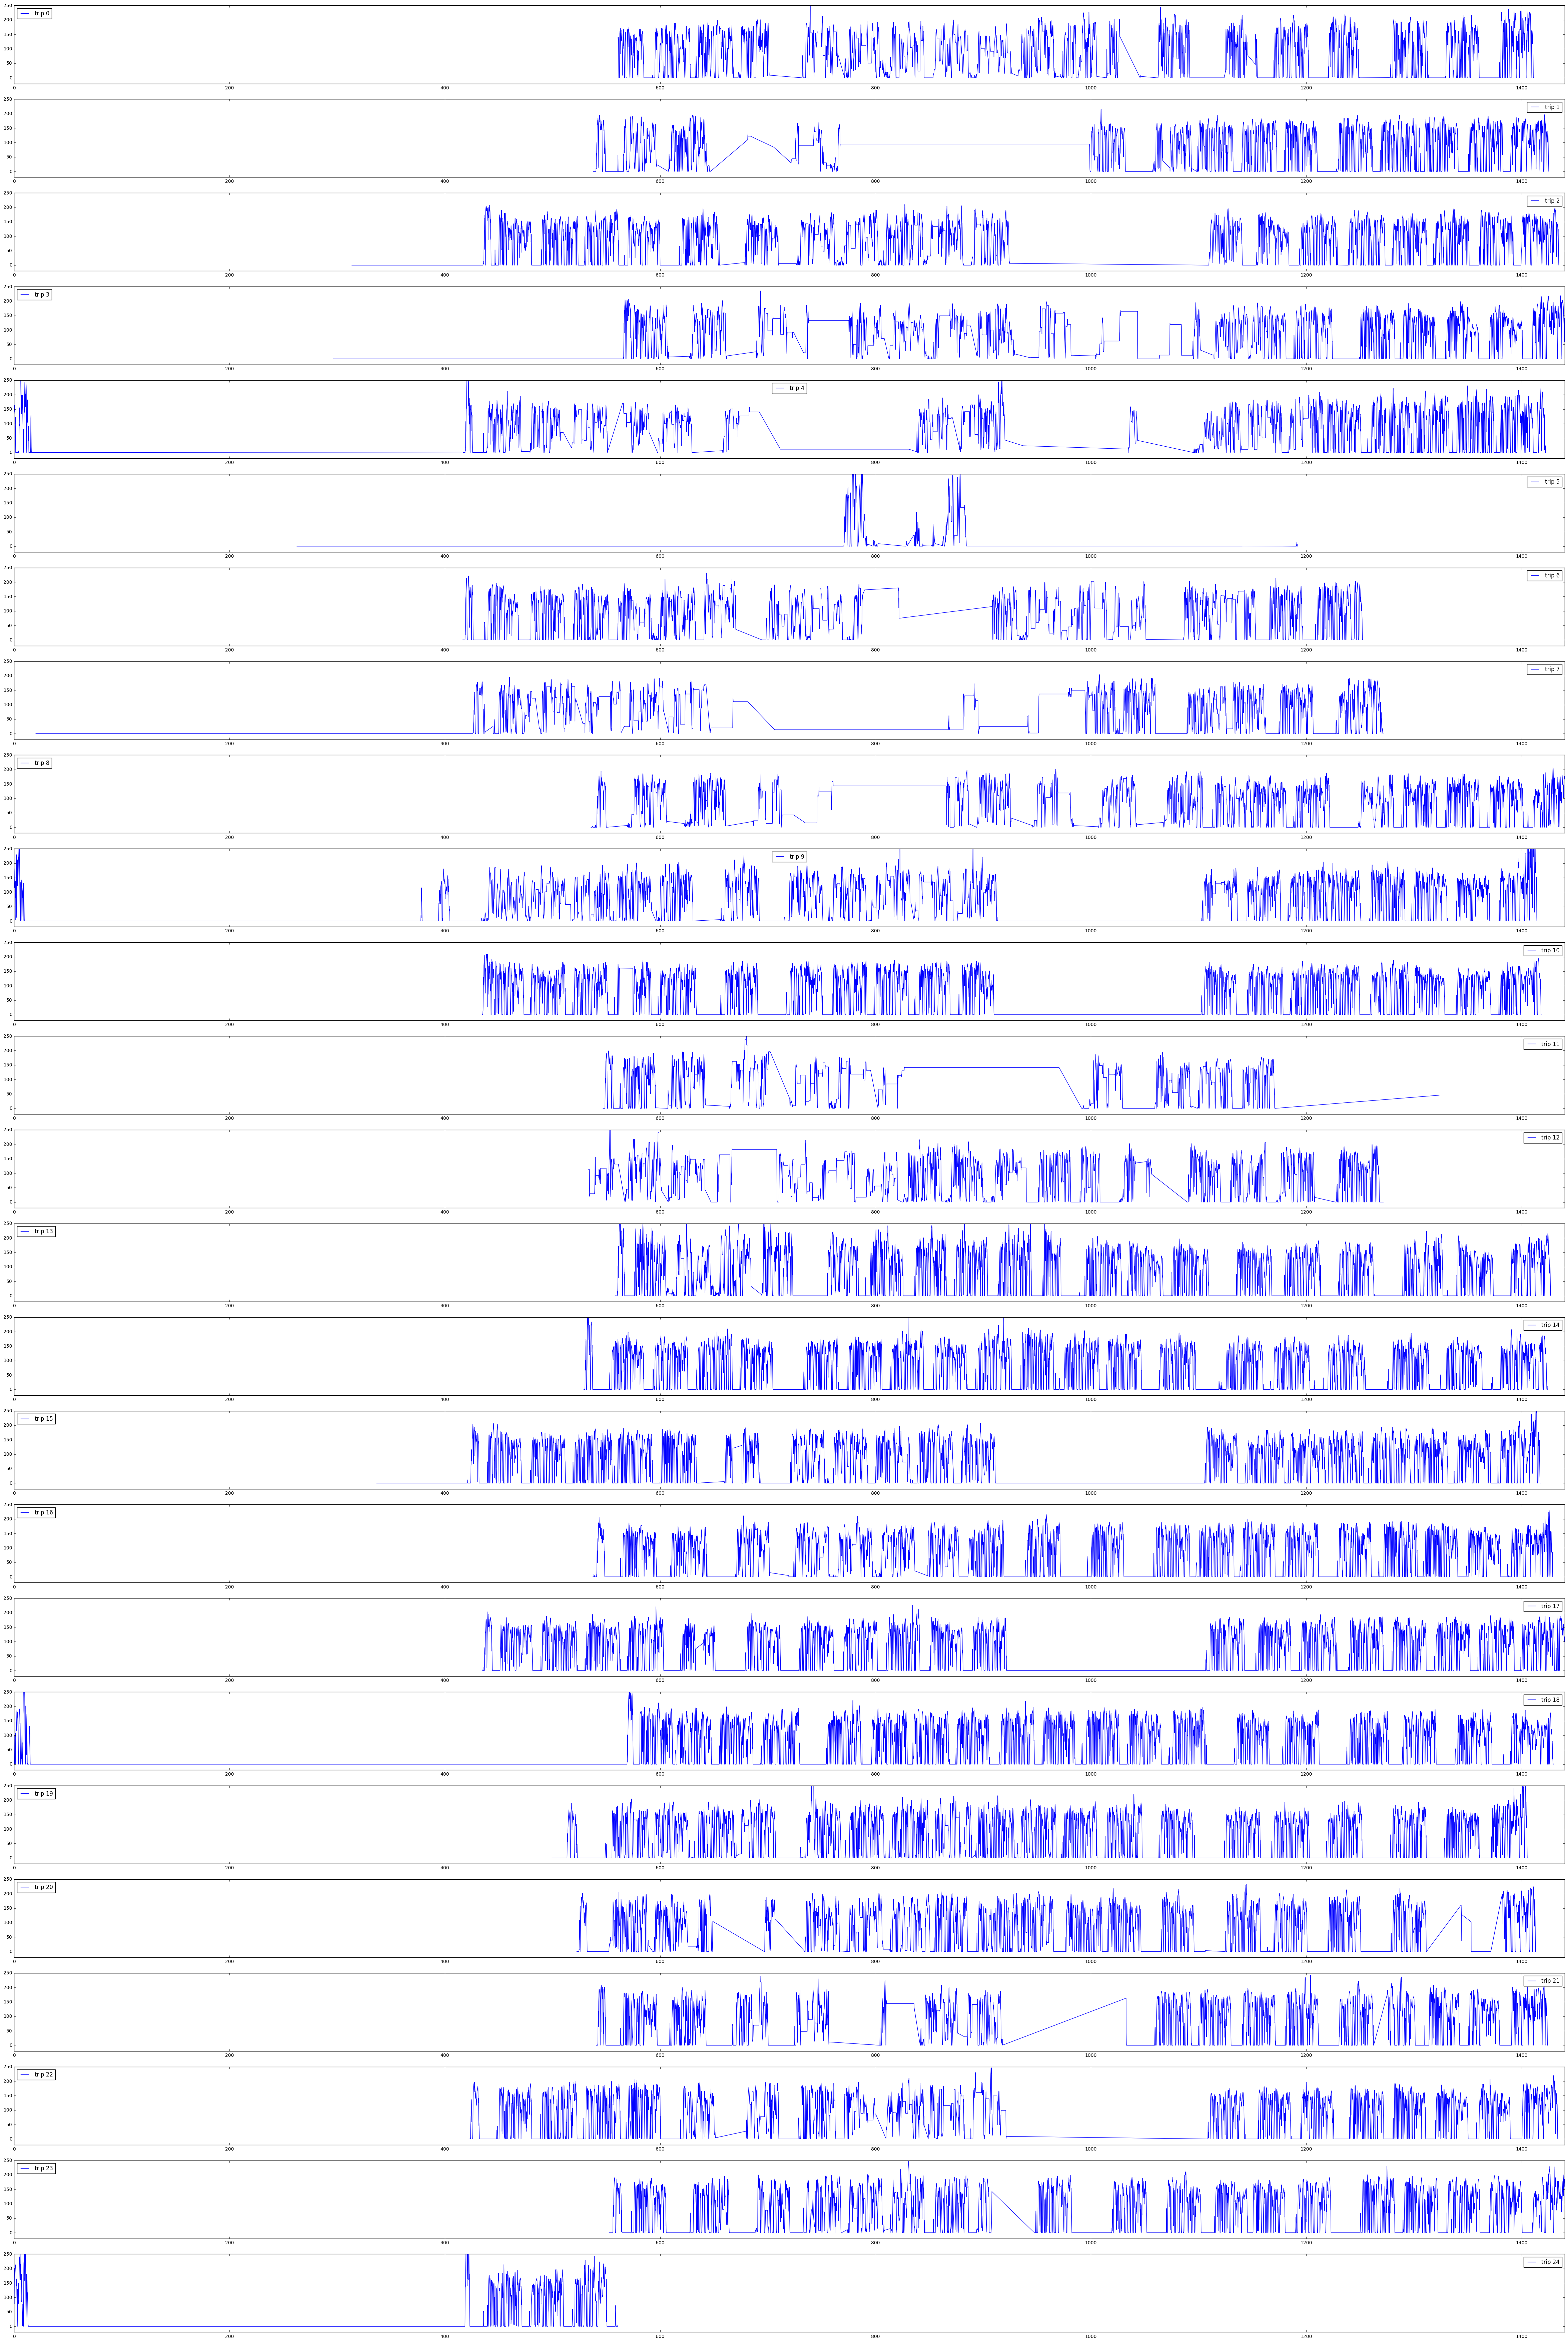

In [24]:
#输入数据、划分点、想要查看的参数，作图
vel_sub_plot(data1,datediv(data1),"速度")

# 按天提取gps获取经纬度，并用R的ggplot2画图

In [25]:
'''
函数名：timestamp2string
作者：王卓文   
日期：16.12.30   
功能：将时间戳转化为年/月/日 小时/分钟/秒的String格式
输入参数：timestamp（13位int）
返回值： str1
'''
def timestamp2string(timeStamp):  
    d = datetime.datetime.fromtimestamp(timeStamp/1000.0)  
    str1 = d.strftime("%Y-%m-%d %H:%M:%S")  

    return str1

In [26]:
'''
函数名：SepGpsData
作者：王卓文   
日期：16.12.30   
功能：按照天将数据划分为不同的数据块，并新建数据框，分别存储时间，天数号，经度，纬度，返回该数据框
输入参数：data(数据框格式)
返回值： df1
'''
def SepGpsData(data):
    #新建一列用于存储转换为string格式的时间
    time=[]
    for i in range(len(data["TIMESTAMP"])):
        time.append(timestamp2string(data["TIMESTAMP"][i]))
    
    divnum=datediv(data)

    #新建一列用于存储天数（从1开始计数）
    flag=1
    datenum=[]
    for i in range(len(divnum)/2):
        for j in range(divnum[2*i],divnum[2*i+1]+1):
            datenum.append(flag)
        flag=flag+1
    
    #新建数据框，分别存储时间，天数号，经度，纬度
    df={"time":time,"datenum":datenum,"longitude":data["经度"],"latitude":data["纬度"]}
    df1=pd.DataFrame(data=df)
    
    return df1

In [27]:
df1=SepGpsData(data1)

In [41]:
#存储为CSV以供R进行调用
df1.to_csv("K:/16.12.6-python/data/gpsdata.csv",index=False)

In [ ]:
#R代码
#改代码可以按照天数画出每天的GPS图，并存储（注意，实际操作需要手动调节画图的经纬度范围）
"""
library(ggplot2)
library(ggmap)
data<-read.csv("K:/16.12.6-python/data/gpsdata.csv")
for (i in 1:25){
ggmap(get_openstreetmap(bbox=c(left=121.64,bottom=31.125, righ=121.70, top=31.2), scale=100000))+ 
geom_point(aes(x=longitude,y=latitude,col=factor(datenum),alpha=0.6), data=subset(data,datenum==i),size=0.7, na.rm=TRUE)
ggsave(paste("gps",i,".png"))
}
"""

# 提取某天的数据，并按某个参数（例如速度）划分trip

In [29]:
#读取该车在第15日的数据
divnum=datediv(data1)
data2=data1.loc[divnum[28]:divnum[29]].reset_index(drop=True)

In [39]:
'''
函数名：DeleteDefault
作者：王卓文   
日期：16.12.30   
功能：删除缺省值所在的行
输入参数：data(数据框格式),para(所要查看的缺省值所在的变量，例如"速度")
返回值： data
'''
def DeleteDefault(data,para):
    #筛除para中nan值所在的行
    where_are_nan=np.isnan(data[para])
    dropnum=[]
                    
    for i in range(len(where_are_nan)):
        if where_are_nan[i]:
            dropnum.append(i)
    
    data=data.drop(dropnum,axis=0).reset_index(drop=True)#删掉缺省值所在的行
    return data

In [40]:
'''
函数名：PlotDayPara
作者：王卓文   
日期：16.12.30   
功能：画出某天数据的某参数（如速度）的变化情况，横轴起始点为当天00:00,终止点为24:00，横坐标单位为min
输入参数：data(数据框格式),para(所要查看的变量，例如"速度")
返回值： 无（只作图像）
'''
def PlotDayPara(data,para):
    time=[]
    
    for i in range(len(data["TIMESTAMP"])):
        time.append(timestamp2dayminute(data["TIMESTAMP"][i]))
    
    speed=data[para]
   
    plt.figure(figsize=(25,4))
    plt.xlim(xmax=1440)
    plt.plot(time,speed)

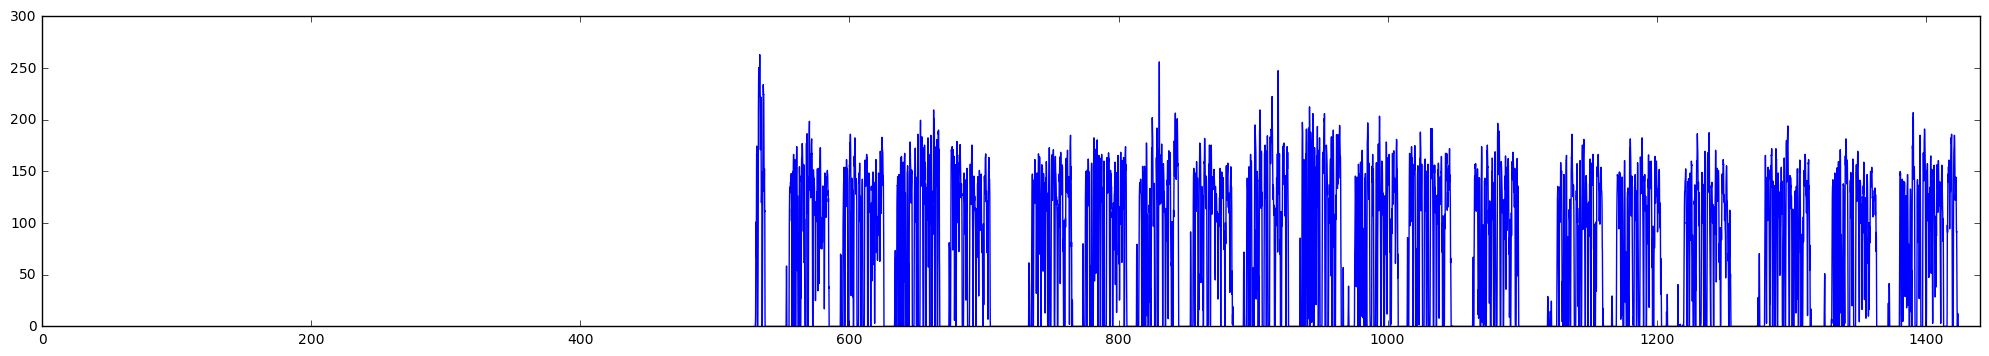

In [41]:
#画出第15天的速度图
data2=DeleteDefault(data2,"速度")#筛除nan值所在的行
PlotDayPara(data2,"速度")

In [58]:
'''
函数名：GenerateTriprecord
作者：王卓文   
日期：16.12.30   
功能：按照某一种变量（此处用速度）划分trip，记录trip起始点和终止点的索引号
输入参数：data(数据框格式),para(用于划分trip的变量，例如"速度")
返回值： triprecord（list类型）
'''
def GenerateTriprecord(data,para):
    
    time=[]
    data=DeleteDefault(data,para)#筛除nan值所在的行
    for i in range(len(data["TIMESTAMP"])):
        time.append(timestamp2dayminute(data["TIMESTAMP"][i]))
    
    speed=data[para]
    #判断trip点位置
    startnum=0
    endnum=0
    triprecord=[0]
    
    for i in range(len(time)-1):
        if(speed[i]<10 and startnum==0):
            startnum=i
        elif(speed[i]<10 and startnum!=0):
            endnum=i
            if(speed[i+1]>10):
                if((time[endnum]-time[startnum])>5):#注意！此处设置为5，即速度5min没动，则设置为新的trip，该参数可调
                    triprecord.append(startnum)
                    triprecord.append(endnum)
                else:
                    startnum=0
                    endnum=0 
        else:
            startnum=0
            endnum=0
    
    triprecord.append(len(time)-1)
    
    return triprecord

In [59]:
'''
函数名：SepTrip
作者：王卓文   
日期：16.12.30   
功能：按照某一种变量（此处用速度）划分trip，生成trip的list
输入参数：data(数据框格式),para(用于划分trip的变量，例如"速度")
返回值： triplist（list类型）
'''
def SepTrip(data,para): 
    triplist=[]
    triprecord=GenerateTriprecord(data,para)
    #按照triprecord划分trip并存入list
    for i in range(len(triprecord)/2):
        triplist.append(data[triprecord[2*i]:triprecord[2*i+1]].reset_index(drop=True))
    
    return triplist

In [60]:
data2=DeleteDefault(data2,"速度")#筛除nan值所在的行
#将data2划分trip
SpeedTripList=SepTrip(data2,"速度")

In [61]:
len(SpeedTripList)

19

In [62]:
'''
函数名：GenerateTripGPS
作者：王卓文   
日期：16.12.30   
功能：按照trip将数据划分为不同的数据块，并新建数据框，分别存储时间，天数号，经度，纬度，返回该数据框
输入参数：data(数据框格式),para(用于划分trip的变量，例如"速度")
返回值： df2
'''
def GenerateTripGPS(data,para):
    triprecord=GenerateTriprecord(data,para)
    #新建一列用于存储天数（从1开始计数）
    flag=1
    tripnum=[]
    
    time=[]   
    for i in range(len(data["TIMESTAMP"])):
        time.append(timestamp2string(data["TIMESTAMP"][i]))#调用了timestamp2string函数
        
    for i in range(len(triprecord)-1):
        if i%2==0:
            for j in range(triprecord[i],triprecord[i+1]):
                tripnum.append(flag)
            flag=flag+1
        else:
            for j in range(triprecord[i],triprecord[i+1]):
                tripnum.append(0)
    tripnum.append(flag-1)
    
    df={"time":time,"tripnum":tripnum,"longitude":data["经度"],"latitude":data["纬度"]}
    df2=pd.DataFrame(data=df)
    
    return df2

In [64]:
data2=DeleteDefault(data2,"速度")#筛除nan值所在的行
df2=GenerateTripGPS(data2,"速度")

In [66]:
df2.to_csv("K:/16.12.6-python/data/tripgpsdata.csv",index=False)